# 6.6 Time Series Analysis

### Contents
    Import Libraries & Data
    Data Prep
    Time Series Analysis - Decomposition
    Testing for Stationarity
    Testing for Autocorrelations

### Import Libraries & Data

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature

plt.style.use('fivethirtyeight')

In [99]:
path = r'C:\\Users\\sstorer\\OneDrive\\Achievement 6 Project'

In [100]:
df = pd.read_csv(os.path.join(path, '02 Datasets', 'Prepared Data', 'mental_health_dataset_cleaned.csv'), index_col=False)

In [101]:
df.shape

(6840, 13)

In [102]:
df.head()

,Unnamed: 0,Country,Year,Prevalence - Mental disorders (Percent),Prevalence - Schizophrenia (Percent),Prevalence - Bipolar disorder (Percent),Prevalence - Eating disorders (Percent),Prevalence - Anxiety disorders (Percent),Prevalence - Drug use disorders (Percent),Prevalence - Depressive disorders (Percent),Prevalence - Alcohol use disorders (Percent),DALYs - Mental disorders (Percent),Burden of Disease - Mental disorders
0,0,Afghanistan,1990,16.659229,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670,Low
1,1,Afghanistan,1991,16.765052,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281,Low
2,2,Afghanistan,1992,16.874469,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189,Low
3,3,Afghanistan,1993,16.990720,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779,Low
4,4,Afghanistan,1994,17.112730,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986,Low


### Data Prep

In [103]:
# Drop index column
df = df.drop('Unnamed: 0', axis=1)

<Axes: title={'center': 'Average Prevalence of Mental Disorders Over Time'}, xlabel='Year', ylabel='Average Prevalence (%)'>

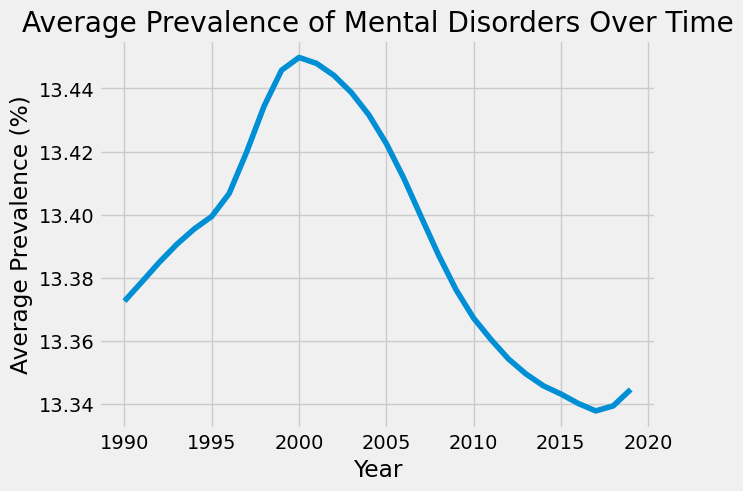

In [104]:
# Create a line chart showing the average prevalence of mental disorders over time
df.groupby('Year')['Prevalence - Mental disorders (Percent)'].mean().plot(kind='line', xlabel='Year', ylabel='Average Prevalence (%)', title='Average Prevalence of Mental Disorders Over Time')

The average prevalence of mental disorders has stayed between 13 and 14 percent from 1990-2019.

In [107]:
df['Yearly Average Prevalence'] = df.groupby('Year')['Prevalence - Mental disorders (Percent)'].transform('mean')

In [142]:
# Create a subset of the data
data_sub = df[['Year', 'Yearly Average Prevalence']]

In [143]:
data_sub.head()

,Year,Yearly Average Prevalence
0,1990,13.372666
1,1991,13.378784
2,1992,13.384990
3,1993,13.390664
4,1994,13.395535


In [144]:
data_sub.set_index('Year', inplace=True)

In [145]:
data_sub.head()

,Yearly Average Prevalence
Year,
1990,13.372666
1991,13.378784
1992,13.384990
1993,13.390664
1994,13.395535


In [146]:
#Find duplicates

duplicates = data_sub.index.duplicated()
print(data_sub.index[duplicates])

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       ...
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype='int64', name='Year', length=6810)


In [147]:
data_sub = data_sub[~data_sub.index.duplicated(keep='first')]

In [148]:
data_sub

,Yearly Average Prevalence
Year,
1990,13.372666
1991,13.378784
1992,13.384990
1993,13.390664
1994,13.395535
1995,13.399484
1996,13.406766
1997,13.419894
1998,13.434432


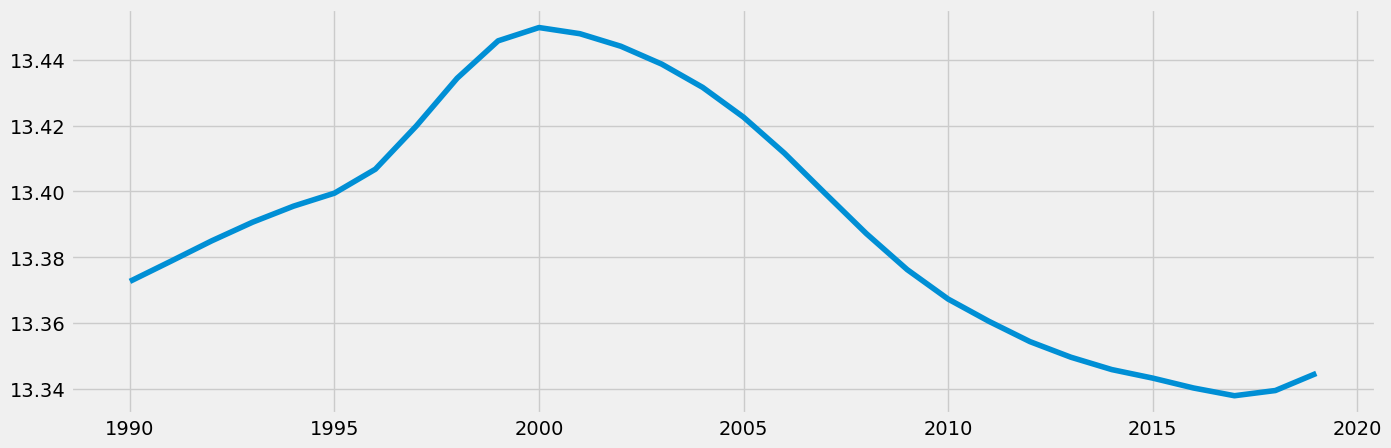

In [149]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### Time Series Analysis - Decomposition

In [164]:
# Decompose the time series using a multiplicative model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative', period=1)

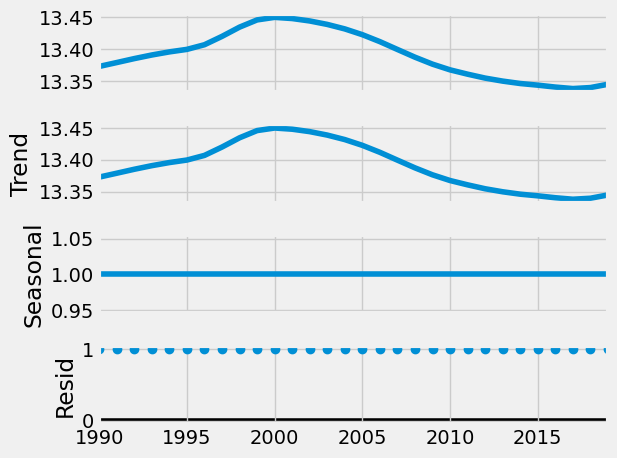

In [162]:
# Plot the separate components

decomposition.plot()
plt.show()

There is a very slight trend to the data showing an increase from 1990-2000 and overall decrease from 2000 on. There is no seasonality or noise to the data. No seasonality makes sense because we are looking at yearly data with the prevalence of mental health disorders, so seasonality wouldn't make much sense to be a factor in this time series.

### Testing for Stationarity

In [170]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Yearly Average Prevalence'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.118961
p-value                         0.025181
Number of Lags Used             3.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


The null hypothesis is that the data is non-stationary. The test statistic is less than the 5% critical value and the p-value is less than 0.05, indicating that we can reject the null hypothesis and that the data is most likely stationary.

### Testing for Autocorrelations

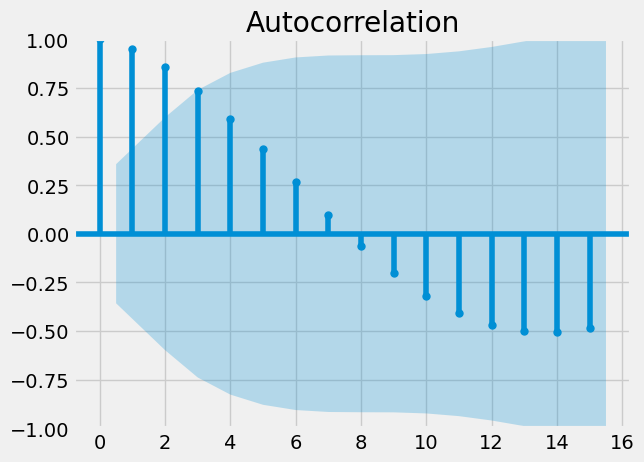

In [174]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()